# Smooth Electricity Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

In [2]:
dates = pd.read_excel("./data/electricityData.xlsx", sheet_name="dates", header=None, converters={0: pd.to_datetime})
sectors = pd.read_excel("./data/electricityData.xlsx", sheet_name="sectors", header=None, converters={0: str})
usage = pd.read_excel("./data/electricityData.xlsx", sheet_name="usage", header=None)

total = usage.iloc[:, -1]
sectors_usage = usage.iloc[:, :3]
sectors = sectors.iloc[:4]

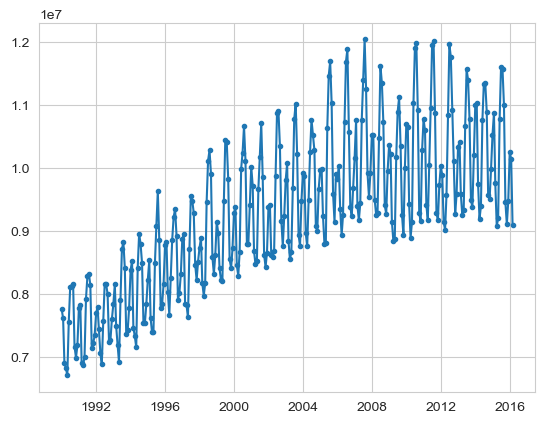

In [3]:
plt.figure()
plt.plot(dates, total, marker='.')
plt.show()

The usage DataFrame contains monthly electricity usage, in MWh, for the U.S., separated by sector. The array sector_usage contains the consumption for three sectors (residential, commercial, and industrial). The array total contains the total consumption. The months are stored in the datetime vector dates. We can smooth the data using the smooth function.

In [4]:
def smooth(a, n):
    """
    a: NumPy 1-D array containing the data to be smoothed
    n: smoothing window size needs, which must be odd number
    """

    out0 = np.convolve(a, np.ones(n, dtype=int), 'valid') / n    
    r = np.arange(1, n-1, 2)
    start = np.cumsum(a[:n-1])[::2] / r
    stop = (np.cumsum(a[:-n:-1])[::2] / r)[::-1]
    
    return np.concatenate((start, out0, stop))

total_smooth_13 = smooth(total, 13)
total_smooth_25 = smooth(total, 25)

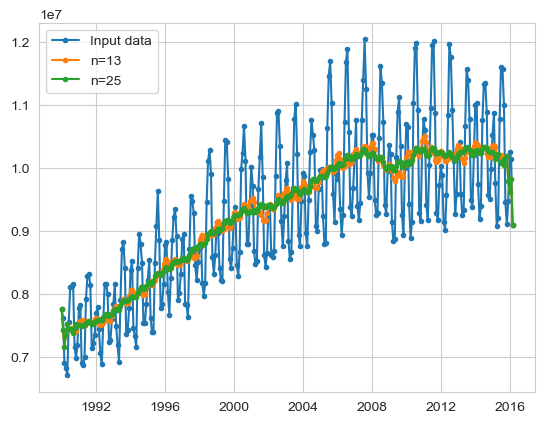

In [5]:
plt.figure()
plt.plot(dates, total, marker='.')
plt.plot(dates, total_smooth_13, marker='.')
plt.plot(dates, total_smooth_25, marker='.')
plt.legend(["Input data", "n=13", "n=25"])
plt.show()

The sector_usage variable contains usage data from three sectors in its three columns.

In [6]:
sectors_usage_24 = sectors_usage.copy()

for column in sectors_usage.columns:
    sectors_usage_24[column] = smooth(sectors_usage_24[column], 25)

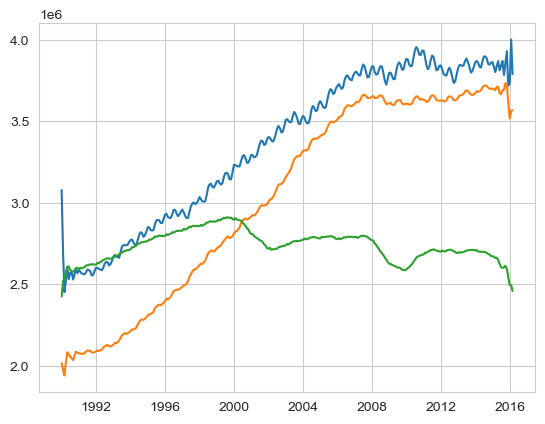

In [7]:
plt.figure()
plt.plot(dates, sectors_usage_24)
plt.show()